# Basal Melt Rates on the Larsen C Ice Shelf    

In this notebook, you will use the change in surface elevation over the Larsen C Ice Shelf from 2010-2016 as measured by NASA's Airborne Topographic Mapper (ATM) to calculate ice shelf basal melt rates. An overview of the region and the flight line of interest is shown below.  

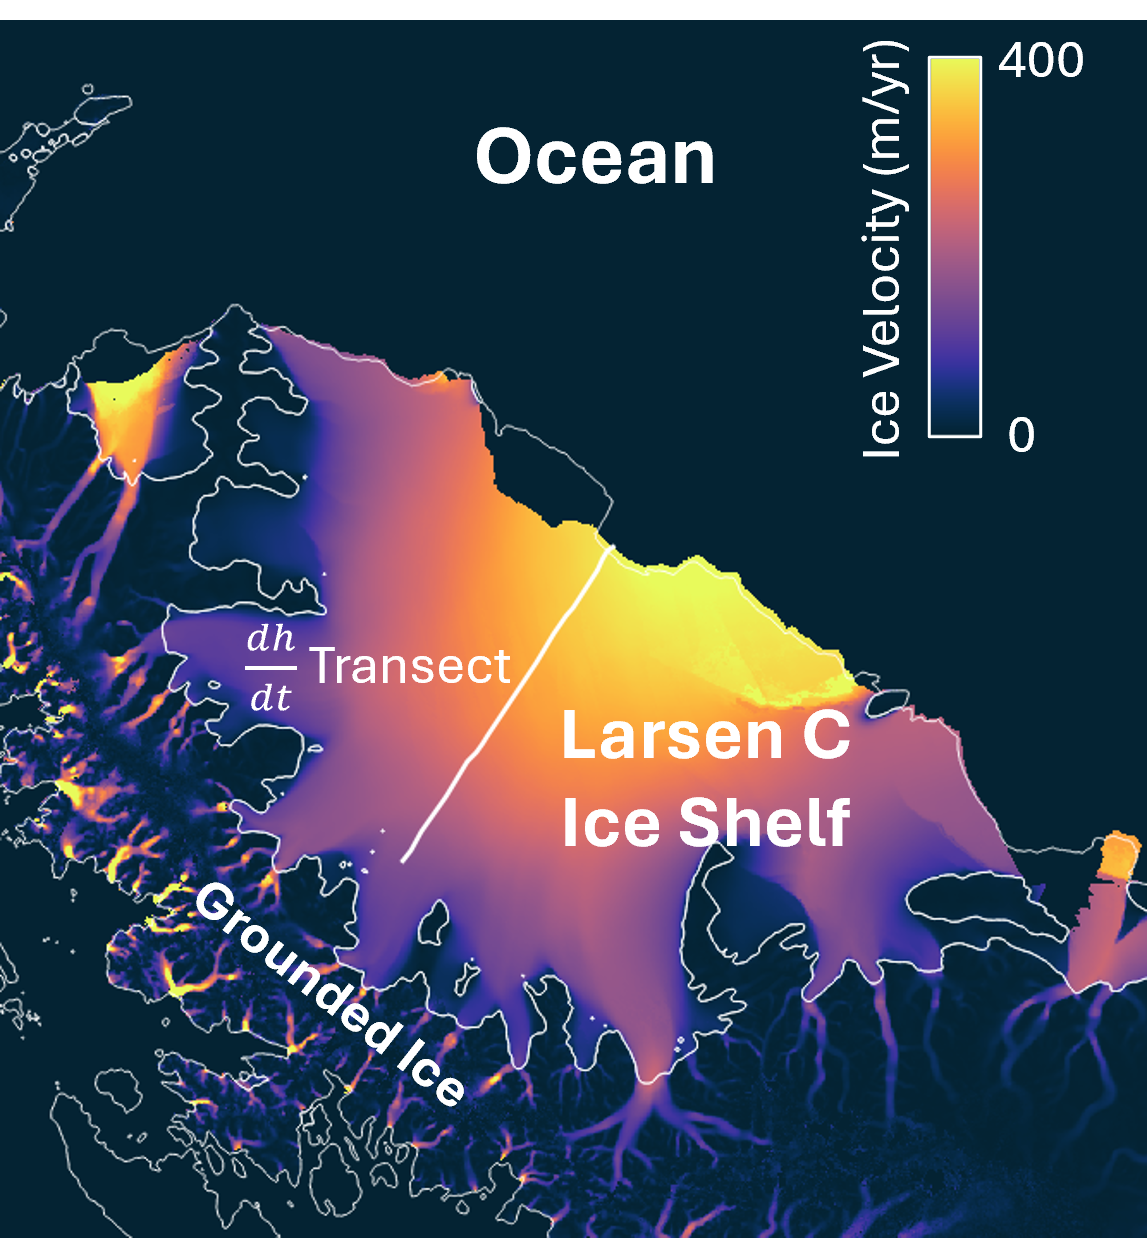

## Part I: Setting the Stage   

**Part 1a: (9 pts)** Before you start coding, briefly read the following paper and answer the questions below.  

Adusumilli et al. (2018) Variable Basal Melt Rates of Antarctic Peninsula Ice Shelves, 1994-2016, *Geophysical Research Letters, 45*, 4086-4095. doi: [10.1002/2017GL076652](https://doi.org/10.1002/2017GL076652)    

(1) Adusumilli et al. (2018) gives an equation for the Eulerian change in ice shelf surface elevation as a function of time. Write out this equation below, define each variable, and give their units.    


(2) Where does this equation come from and what process is it describing?   


(3) In this notebook, you will compute melt rates along a flow line so you can treat the problem as 1D (e.g. if x is your along-flow direction, there is no divergence of ice flux in the y direction across flow). Rewrite the equation from Question 1 for this 1D scenario.   

## Part II: Calculating Basal Melt Rates     

As usual, we need to mount our Google Drive and import the various libraries we want to use. The code below will set up interactive plotting, so that you can mouse over your graphs and read off numbers, or zoom in on regions of interest.  Make sure that you have saved the data file (LarsenCData.csv) to the Google drive associated with the account you use for Google Colab in a directory called /EAS4940/ProblemSet5.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install mpl_interactions
!pip install ipympl

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_interactions import zoom_factory, panhandler
import pandas as pd
import scipy
from google.colab import output

output.enable_custom_widget_manager()

The code below imports the data set. Make sure you go through the README file that came with the dataset so you understand what data is available to you and what units the data are provided in.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EAS4940/ProblemSet5/LarsenCData.csv', sep=',', header=0)

**Part 2a: (10 pts)** Use the provided data to calculate the basal melt rate in meters per year along the flow line. You can assume that the change in surface elevation from change in firn air content is zero.

Plot the raw basal melt rates on one plot, and spatially smoothed basal melt rates on a second plot. Use a window size of 10 km when smoothing the basal melt rate.   

(Hint: you can use the pandas function .rolling().mean() to calculate the rolling average of the melt rates. Check out the documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

**Part 2b: (18 pts)** Use your plots from Part 2a to answer the questions below.   

(1) What is the average basal melt rate in meters of ice per year along this flow line?    


(2) Based on the melt rates you calculated, do you think we would classify the Larsen C ice shelf as a "cold cavity" ice shelf or a "warm cavity" ice shelf? Why?    


(3) Which melting mode (1,2,3 or some combination) do your melt rates seem most consistent with? Draw a sketch of the physical processes under the ice shelf that lead to melting in your chosen mode and explain how your calculated melt rates are consistent with that mode.    


(4) Compare your melt rates to those shown in Adusumilli et al. (2018), Figure 2. How do your melt rates compare? What are some factors that might account for any discrepancies and why?    

**Part 2c: (10 pts)** You may have noticed that there is a field called "error" included with the dataset that gives the root means square error on the reported surface elevation change. Below, you will use Monte Carlo error propogation to see how these errors lead to uncertainty in the basal melt rates you calculated.  

The function provided below generates a new dh/dt vector that could plausibly be the true surface elevation change, given the measured errors. By running this function many times and re-calculating the basal melt rate with the new dh/dt vector, you can map out the range of statistically plausible basal melt rates.   

(1) Run the provided function 1000 times and calculate the new basal melt rates for each of the 1000 iterations with the new dh/dt vector generated by the function. Save your results in 1000 x length(dh/dt) matrix.   

(2) For each column in your matrix, calculate the standard deviation of the values. In doing so, you will be finding the standard deviation of the plausible basal melt rates at each location along the flow line.  

(3) Plot the original basal melt rates you calculated in Part 2a. On the same plot, plot the original basal melt rates plus and minus one standard deviation as calculated from your Monte Carlo analysis.

In [ ]:
def new_dhdt(dhdt, rms_error):
  uncertainty = np.random.normal(0, data['error'])
  return dhdt + uncertainty

**Part 2d: (3 pts)** How does the magnitude of the uncertainty compare to the average basal melt rate? What did you learn about the importance of being aware of data uncertainty?    

Export your final notebook to PDF and submit on Canvas. Remember to use the file browser on the left of your screen within Google Colab (the folder button) to find the final PDF.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

!cp "/content/drive/MyDrive/Colab Notebooks/PS5_BasalMelt_Solutions.ipynb" ./

!jupyter nbconvert --to PDF "PS5_BasalMelt_Solutions.ipynb"